In [59]:
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import numpy as np

In [27]:
train_data  = pd.read_csv("/mnt/d/Dropbox/Kaggler/Loan Prediction/playground-series-s4e10/train.csv")
train = train_data.drop("id", axis=1)
test_data  = pd.read_csv("/mnt/d/Dropbox/Kaggler/Loan Prediction/playground-series-s4e10/test.csv")
test = test_data .drop("id", axis=1)
original = pd.read_csv('/mnt/d/Dropbox/Kaggler/Loan Prediction/playground-series-s4e10/credit_risk_dataset.csv')

In [28]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary
resumetable(train)

Dataset Shape: (58645, 12)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,person_age,int64,0,53,37,22,29,4.15
1,person_income,int64,0,2641,35000,56000,28800,7.19
2,person_home_ownership,object,0,4,RENT,OWN,OWN,1.25
3,person_emp_length,float64,0,36,0.0,6.0,8.0,3.73
4,loan_intent,object,0,6,EDUCATION,MEDICAL,PERSONAL,2.56
5,loan_grade,object,0,7,B,C,A,1.95
6,loan_amnt,int64,0,545,6000,4000,6000,5.35
7,loan_int_rate,float64,0,362,11.49,13.35,8.9,6.88
8,loan_percent_income,float64,0,61,0.17,0.07,0.21,5.06
9,cb_person_default_on_file,object,0,2,N,N,N,0.61


## Read data
### Feature Descriptions
person_age: Applicant’s age in years.

person_income: Annual income of the applicant in USD.

person_home_ownership: Status of homeownership (e.g., Rent, Own, Mortgage).

person_emp_length: Length of employment in years.

loan_intent: Purpose of the loan (e.g., Education, Medical, Personal).

loan_grade: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.

loan_amnt: Total loan amount requested by the applicant.

loan_int_rate: Interest rate associated with the loan.

loan_percent_income: Percentage of the applicant’s income allocated towards loan repayment.

cb_person_default_on_file: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).

cb_person_cred_hist_length: Length of the applicant’s credit history in years.

loan_status: The approval status of the loan (approved or not approved).

https://www.kaggle.com/code/igorvolianiuk/loan-approval-eda-catboost-optuna

In [29]:
to_keep = ['loan_amnt', 'person_emp_length', 'loan_intent', 'person_income',
       'loan_int_rate', 'person_home_ownership', 'loan_grade',
       'loan_percent_income', 'loan_status']

In [30]:
train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [32]:
train_eda = train[to_keep]

In [34]:
train_eda

,loan_amnt,person_emp_length,loan_intent,person_income,loan_int_rate,person_home_ownership,loan_grade,loan_percent_income,loan_status
0,6000,0.0,EDUCATION,35000,11.49,RENT,B,0.17,0
1,4000,6.0,MEDICAL,56000,13.35,OWN,C,0.07,0
2,6000,8.0,PERSONAL,28800,8.90,OWN,A,0.21,0
3,12000,14.0,VENTURE,70000,11.11,RENT,B,0.17,0
4,6000,2.0,MEDICAL,60000,6.92,RENT,A,0.10,0
...,...,...,...,...,...,...,...,...,...
58640,25000,5.0,EDUCATION,120000,15.95,MORTGAGE,D,0.21,0
58641,10000,0.0,MEDICAL,28800,12.73,RENT,C,0.35,1
58642,6800,7.0,EDUCATION,44000,16.00,RENT,D,0.15,1
58643,5000,2.0,EDUCATION,30000,8.90,RENT,A,0.17,0


In [36]:
test_eda = test[['loan_amnt', 'person_emp_length', 'loan_intent', 'person_income',
       'loan_int_rate', 'person_home_ownership', 'loan_grade',
       'loan_percent_income']]
test_eda


,loan_amnt,person_emp_length,loan_intent,person_income,loan_int_rate,person_home_ownership,loan_grade,loan_percent_income
0,25000,3.0,HOMEIMPROVEMENT,69000,15.76,RENT,F,0.36
1,10000,6.0,PERSONAL,96000,12.68,MORTGAGE,C,0.10
2,4000,5.0,VENTURE,30000,17.19,RENT,E,0.13
3,7000,4.0,DEBTCONSOLIDATION,50000,8.90,RENT,A,0.14
4,15000,8.0,HOMEIMPROVEMENT,102000,16.32,MORTGAGE,D,0.15
...,...,...,...,...,...,...,...,...
39093,3000,2.0,DEBTCONSOLIDATION,31200,10.37,MORTGAGE,B,0.10
39094,7000,6.0,EDUCATION,48000,6.03,MORTGAGE,A,0.15
39095,15000,0.0,PERSONAL,60000,7.51,MORTGAGE,A,0.25
39096,14000,4.0,PERSONAL,36000,15.62,MORTGAGE,D,0.39


### Loan Status Class imbalance

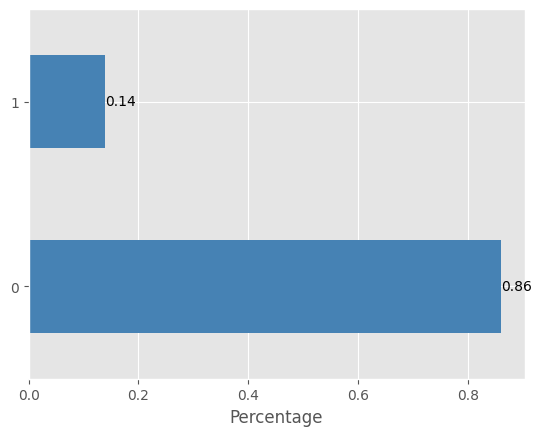

In [37]:
ax = round(train_eda['loan_status'].value_counts(normalize=True), 2).plot(kind='barh', color='steelblue')
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)
plt.xlabel('Percentage');

In [38]:
(1 - train_eda['loan_status'].mean()) / train_eda['loan_status'].mean()

6.023353293413173

Observation:
- Big class imbalance in the data
- The number of samples in the majority class is about 6 times those in the minority class.

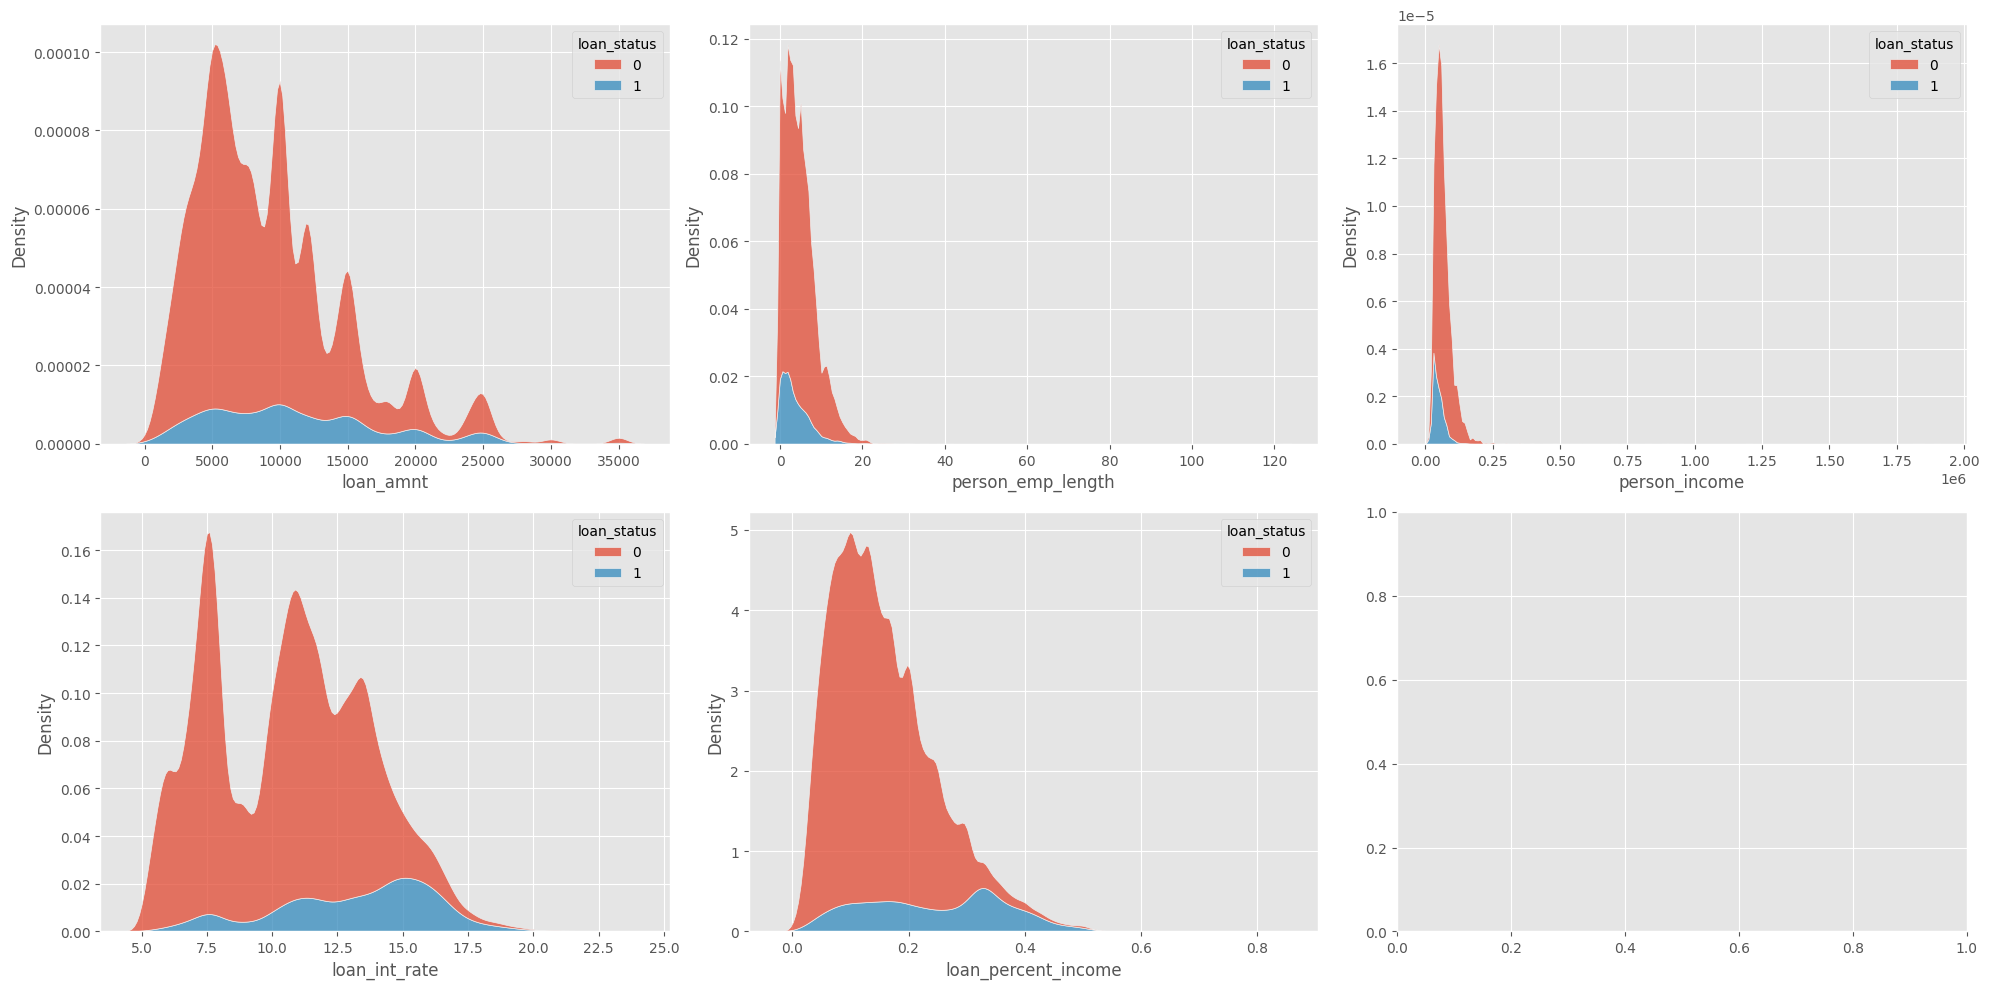

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(data=train_eda, x="loan_amnt", hue="loan_status", multiple="stack", ax=axes[0, 0]);
sns.kdeplot(data=train_eda, x="person_emp_length", hue="loan_status", multiple="stack", ax=axes[0, 1]);
sns.kdeplot(data=train_eda, x="person_income", hue="loan_status", multiple="stack", ax=axes[0, 2]);
sns.kdeplot(data=train_eda, x="loan_int_rate", hue="loan_status", multiple="stack", ax=axes[1, 0]);
sns.kdeplot(data=train_eda, x="loan_percent_income", hue="loan_status", multiple="stack", ax=axes[1, 1]);
plt.tight_layout();

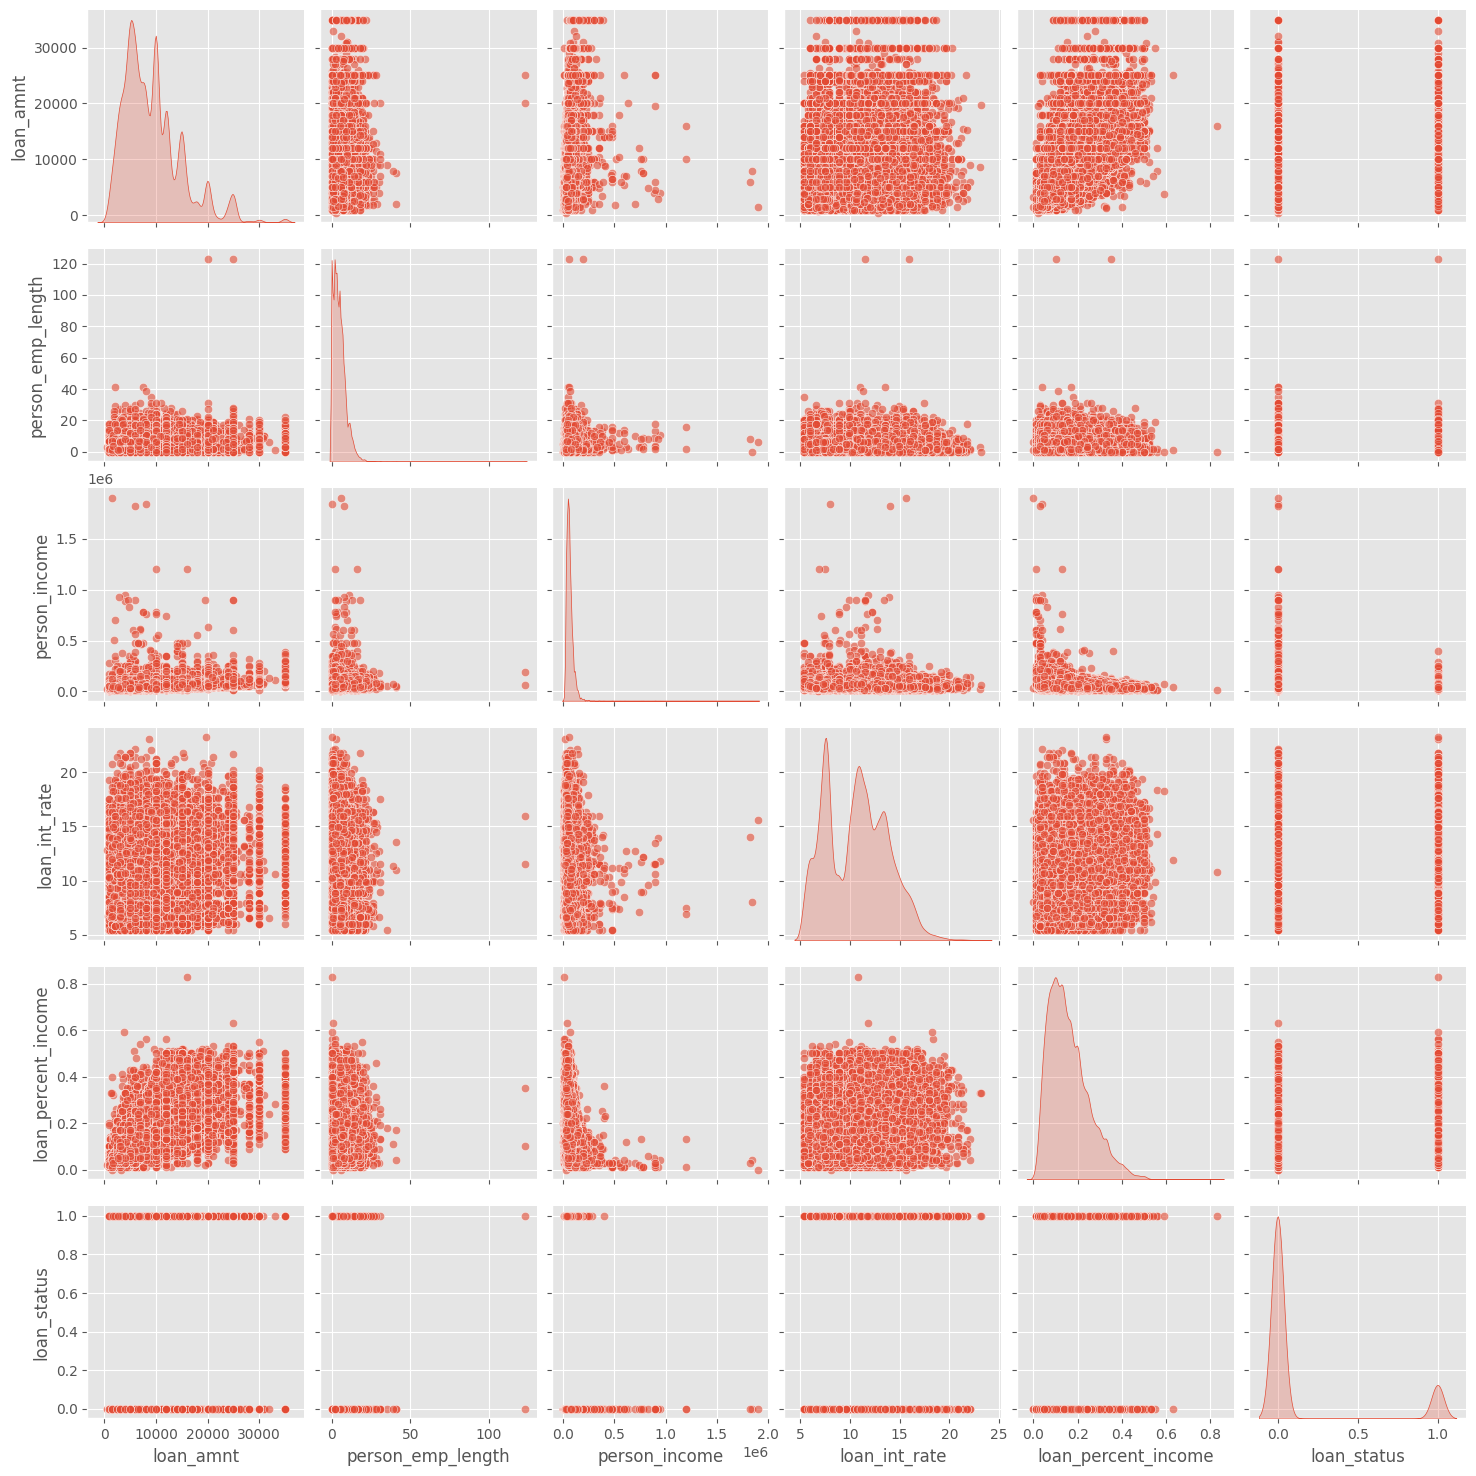

In [41]:
sns.pairplot(train[to_keep], plot_kws={'alpha': 0.6}, diag_kind='kde');

Observations from looking at the histograms on the diagonal
- All 5 features are right skewed. Especially person_income & person_emp_length

Generating frequencies for categorical features

In [43]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary
resumetable(train_eda)

Dataset Shape: (58645, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,loan_amnt,int64,0,545,6000,4000,6000,5.35
1,person_emp_length,float64,0,36,0.0,6.0,8.0,3.73
2,loan_intent,object,0,6,EDUCATION,MEDICAL,PERSONAL,2.56
3,person_income,int64,0,2641,35000,56000,28800,7.19
4,loan_int_rate,float64,0,362,11.49,13.35,8.9,6.88
5,person_home_ownership,object,0,4,RENT,OWN,OWN,1.25
6,loan_grade,object,0,7,B,C,A,1.95
7,loan_percent_income,float64,0,61,0.17,0.07,0.21,5.06
8,loan_status,int64,0,2,0,0,0,0.59


In [44]:
resumetable(test_eda)


Dataset Shape: (39098, 8)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,loan_amnt,int64,0,482,25000,10000,4000,5.33
1,person_emp_length,float64,0,31,3.0,6.0,5.0,3.72
2,loan_intent,object,0,6,HOMEIMPROVEMENT,PERSONAL,VENTURE,2.56
3,person_income,int64,0,2196,69000,96000,30000,7.16
4,loan_int_rate,float64,0,336,15.76,12.68,17.19,6.89
5,person_home_ownership,object,0,4,RENT,MORTGAGE,RENT,1.26
6,loan_grade,object,0,7,F,C,E,1.94
7,loan_percent_income,float64,0,63,0.36,0.1,0.13,5.06


In [52]:
pd.concat([train_eda.person_home_ownership.value_counts(normalize=True, dropna=False), test_eda.person_home_ownership.value_counts(normalize=True, dropna=False)], axis=1, keys=['train_person_home_ownership', 'test_person_home_ownership'])

,train_person_home_ownership,test_person_home_ownership
RENT,0.521681,0.518697
MORTGAGE,0.423293,0.426697
OWN,0.053508,0.052586
OTHER,0.001518,0.002021


In [50]:
pd.concat([train_eda.loan_intent.value_counts(normalize=True, dropna=False), test_eda.loan_intent.value_counts(normalize=True, dropna=False)], axis=1, keys=['train_loan_intent', 'test_loan_intent'])

,train_loan_intent,test_loan_intent
EDUCATION,0.209242,0.206558
MEDICAL,0.186444,0.190470
PERSONAL,0.170790,0.174306
VENTURE,0.170705,0.169625
DEBTCONSOLIDATION,0.155734,0.151287
HOMEIMPROVEMENT,0.107085,0.107755


In [53]:
pd.concat([train_eda.loan_grade.value_counts(normalize=True, dropna=False), test_eda.loan_grade.value_counts(normalize=True, dropna=False)], axis=1, keys=['train_loan_grade', 'test_loan_grade'])

,train_loan_grade,test_loan_grade
A,0.357814,0.358202
B,0.347856,0.347946
C,0.188183,0.190803
D,0.085839,0.083610
E,0.017205,0.016292
F,0.002541,0.002686
G,0.000563,0.000460


In [54]:
train_eda.filter(like="loan_amnt").apply(pd.value_counts,normalize=True)

,loan_amnt
10000,0.121545
5000,0.088260
6000,0.079734
12000,0.073510
15000,0.057089
...,...
18150,0.000017
21125,0.000017
15025,0.000017
21400,0.000017


In [55]:
catcols = train_eda.select_dtypes(include=["object"]).columns
catcols

Index(['loan_intent', 'person_home_ownership', 'loan_grade'], dtype='object')

In [56]:
for col in train_eda[catcols]:
    train_eda[col] = train_eda[col].astype('category')
resumetable(train_eda)
train_eda[catcols].dtypes

Dataset Shape: (58645, 9)


/tmp/ipykernel_11767/1720565138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_eda[col] = train_eda[col].astype('category')
/tmp/ipykernel_11767/1720565138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_eda[col] = train_eda[col].astype('category')
/tmp/ipykernel_11767/1720565138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

loan_intent              category
person_home_ownership    category
loan_grade               category
dtype: object

#### Generating summary statistics for continuous and discrete features

In [57]:
train_eda.describe()

,loan_amnt,person_emp_length,person_income,loan_int_rate,loan_percent_income,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000
mean,9217.556518,4.701015,6.404617e+04,10.677874,0.159238,0.142382
std,5563.807384,3.959784,3.793111e+04,3.034697,0.091692,0.349445
min,500.000000,0.000000,4.200000e+03,5.420000,0.000000,0.000000
25%,5000.000000,2.000000,4.200000e+04,7.880000,0.090000,0.000000
50%,8000.000000,4.000000,5.800000e+04,10.750000,0.140000,0.000000
75%,12000.000000,7.000000,7.560000e+04,12.990000,0.210000,0.000000
max,35000.000000,123.000000,1.900000e+06,23.220000,0.830000,1.000000


We can see that for all continous variables that the mean and median values are not too substantial in difference indicating no issue with Skewness.

In [60]:
train_eda.quantile(np.arange(0.0, 1.1, 0.1))

/tmp/ipykernel_11767/3729599530.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_eda.quantile(np.arange(0.0, 1.1, 0.1))


,loan_amnt,person_emp_length,person_income,loan_int_rate,loan_percent_income,loan_status
0.0,500.0,0.0,4200.0,5.42,0.00,0.0
0.1,3000.0,0.0,31200.0,6.76,0.06,0.0
0.2,5000.0,1.0,39480.0,7.51,0.08,0.0
0.3,5600.0,2.0,45000.0,8.00,0.10,0.0
0.4,7000.0,3.0,50000.0,9.99,0.12,0.0
0.5,8000.0,4.0,58000.0,10.75,0.14,0.0
0.6,10000.0,5.0,63000.0,11.49,0.17,0.0
0.7,10800.0,6.0,72000.0,12.53,0.20,0.0
0.8,13000.0,7.0,83119.2,13.49,0.23,0.0
0.9,16000.0,10.0,100000.0,14.72,0.29,1.0


For all features the range (the distance between the min and max values) is in the last 10% of the distribution. This hints at possible modeling problems and invites us to take a close look at outliers.

In [61]:
skew_kurt_df = pd.DataFrame({
    'skew': train_eda.skew(),
    'kurtosis': train_eda.kurtosis()
})
skew_kurt_df

/tmp/ipykernel_11767/2969142770.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'skew': train_eda.skew(),
/tmp/ipykernel_11767/2969142770.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'kurtosis': train_eda.kurtosis()


,skew,kurtosis
loan_amnt,1.188578,1.693784
person_emp_length,2.054430,29.131606
person_income,10.457723,342.629353
loan_int_rate,0.200020,-0.718153
loan_percent_income,0.917473,0.631343
loan_status,2.046848,2.189663


Loan_int_rate appears to be the closest feature to being normally distributed and has a low kurtosis (skinny tail)

person_emp_length & lperson_income profile as the complete opposite to normally distributed and low kurtiosis.

In [62]:
from scipy import stats as scistat
key_vals = ["loan_int_rate", "person_emp_length", "person_income", "loan_amnt", "loan_percent_income"]

for var in key_vals[1:]:
    stat, p = scistat.shapiro(train_eda[var])
    print("feature: ", var, "p-value: ", '{:.4f}'.format(p))


feature:  person_emp_length p-value:  0.0000
feature:  person_income p-value:  0.0000
feature:  loan_amnt p-value:  0.0000
feature:  loan_percent_income p-value:  0.0000


/home/yunix/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58645.
  res = hypotest_fun_out(*samples, **kwds)


None of the distributions approximates a normal distribution

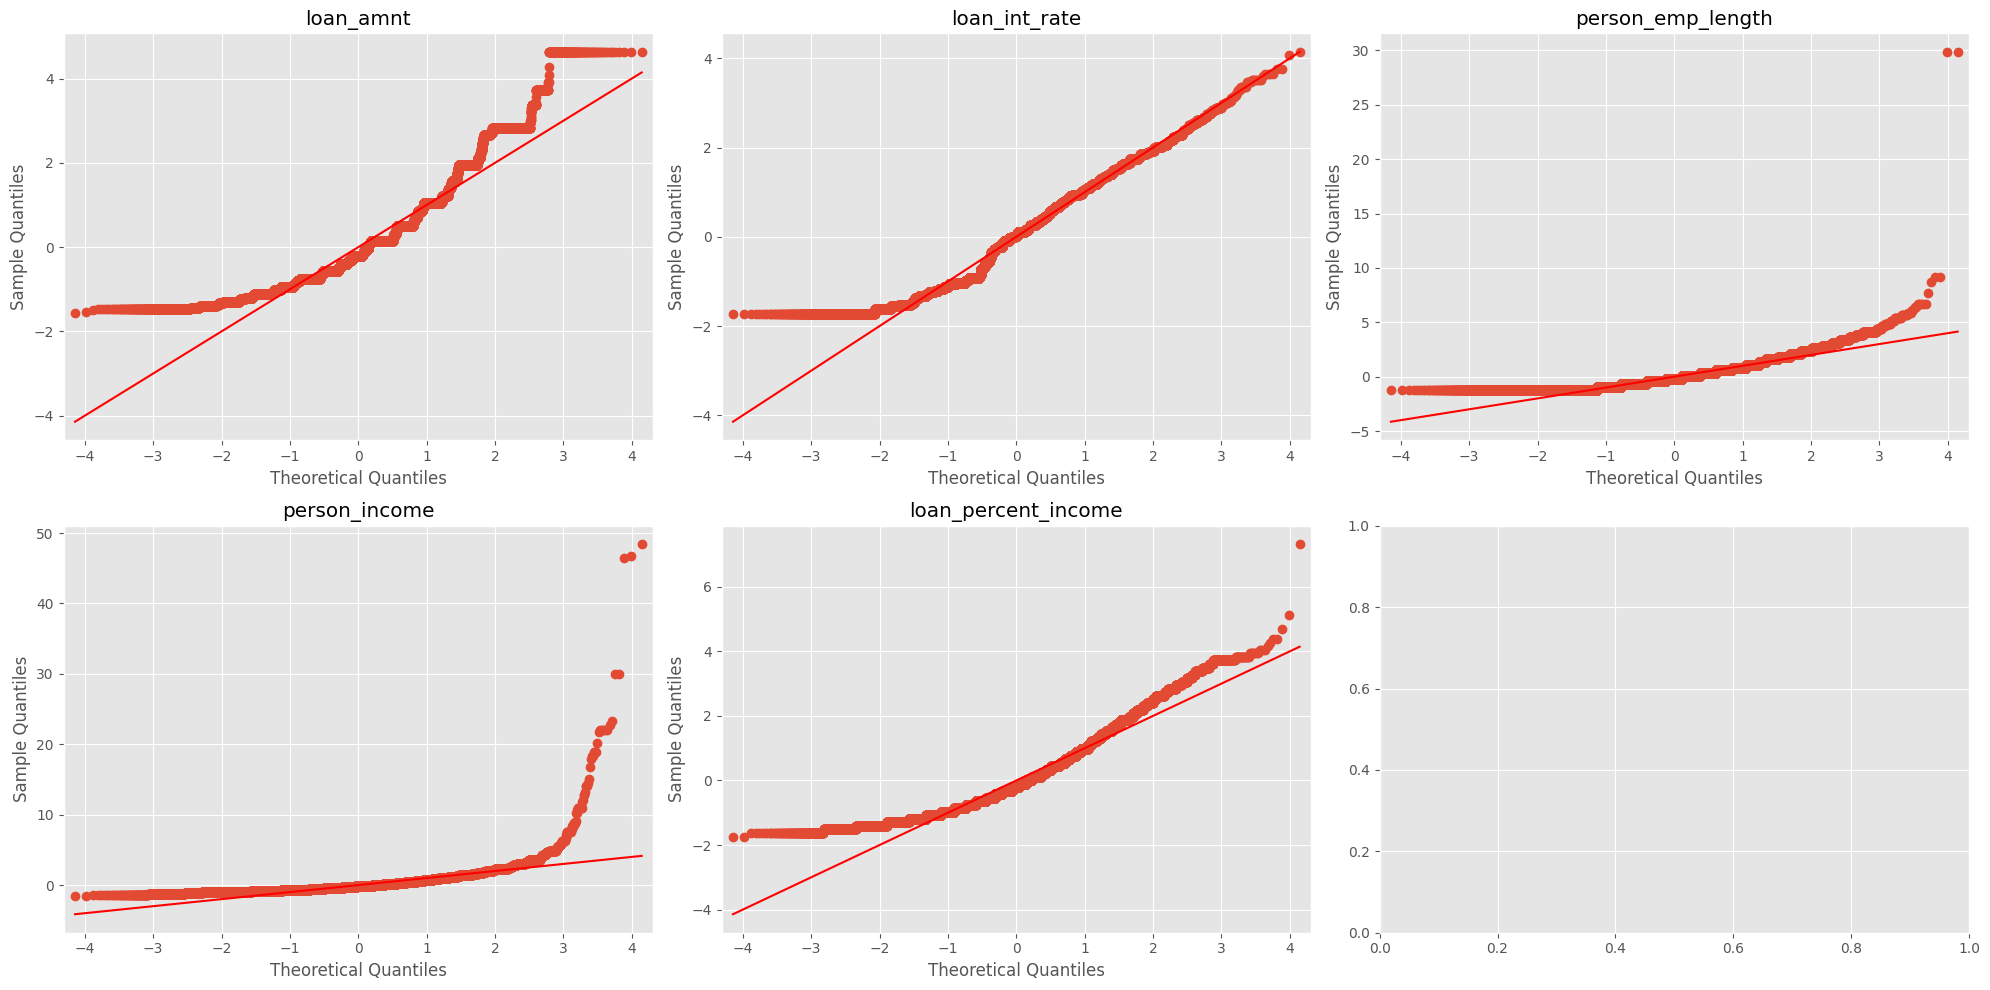

In [63]:
import statsmodels.api as sm
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sm.qqplot(train_eda[['loan_amnt']].sort_values(['loan_amnt']).dropna(), line='s', ax=axes[0, 0], fit=True)
axes[0, 0].set_title('loan_amnt')
sm.qqplot(train_eda[['loan_int_rate']].sort_values(['loan_int_rate']).dropna(), line='s', ax=axes[0, 1], fit=True)
axes[0, 1].set_title('loan_int_rate')
sm.qqplot(train_eda[['person_emp_length']].sort_values(['person_emp_length']).dropna(), line='s', ax=axes[0, 2], fit=True)
axes[0, 2].set_title('person_emp_length')
sm.qqplot(train_eda[['person_income']].sort_values(['person_income']).dropna(), line='s', ax=axes[1, 0], fit=True)
axes[1, 0].set_title('person_income')
sm.qqplot(train_eda[['loan_percent_income']].sort_values(['loan_percent_income']).dropna(), line='s', ax=axes[1, 1], fit=True)
axes[1, 1].set_title('loan_percent_income')
plt.tight_layout()
plt.show()

Along most of the range, the distribution of loan_int_rate looks pretty close to normal. The exc exceptions are the extremely low rates.

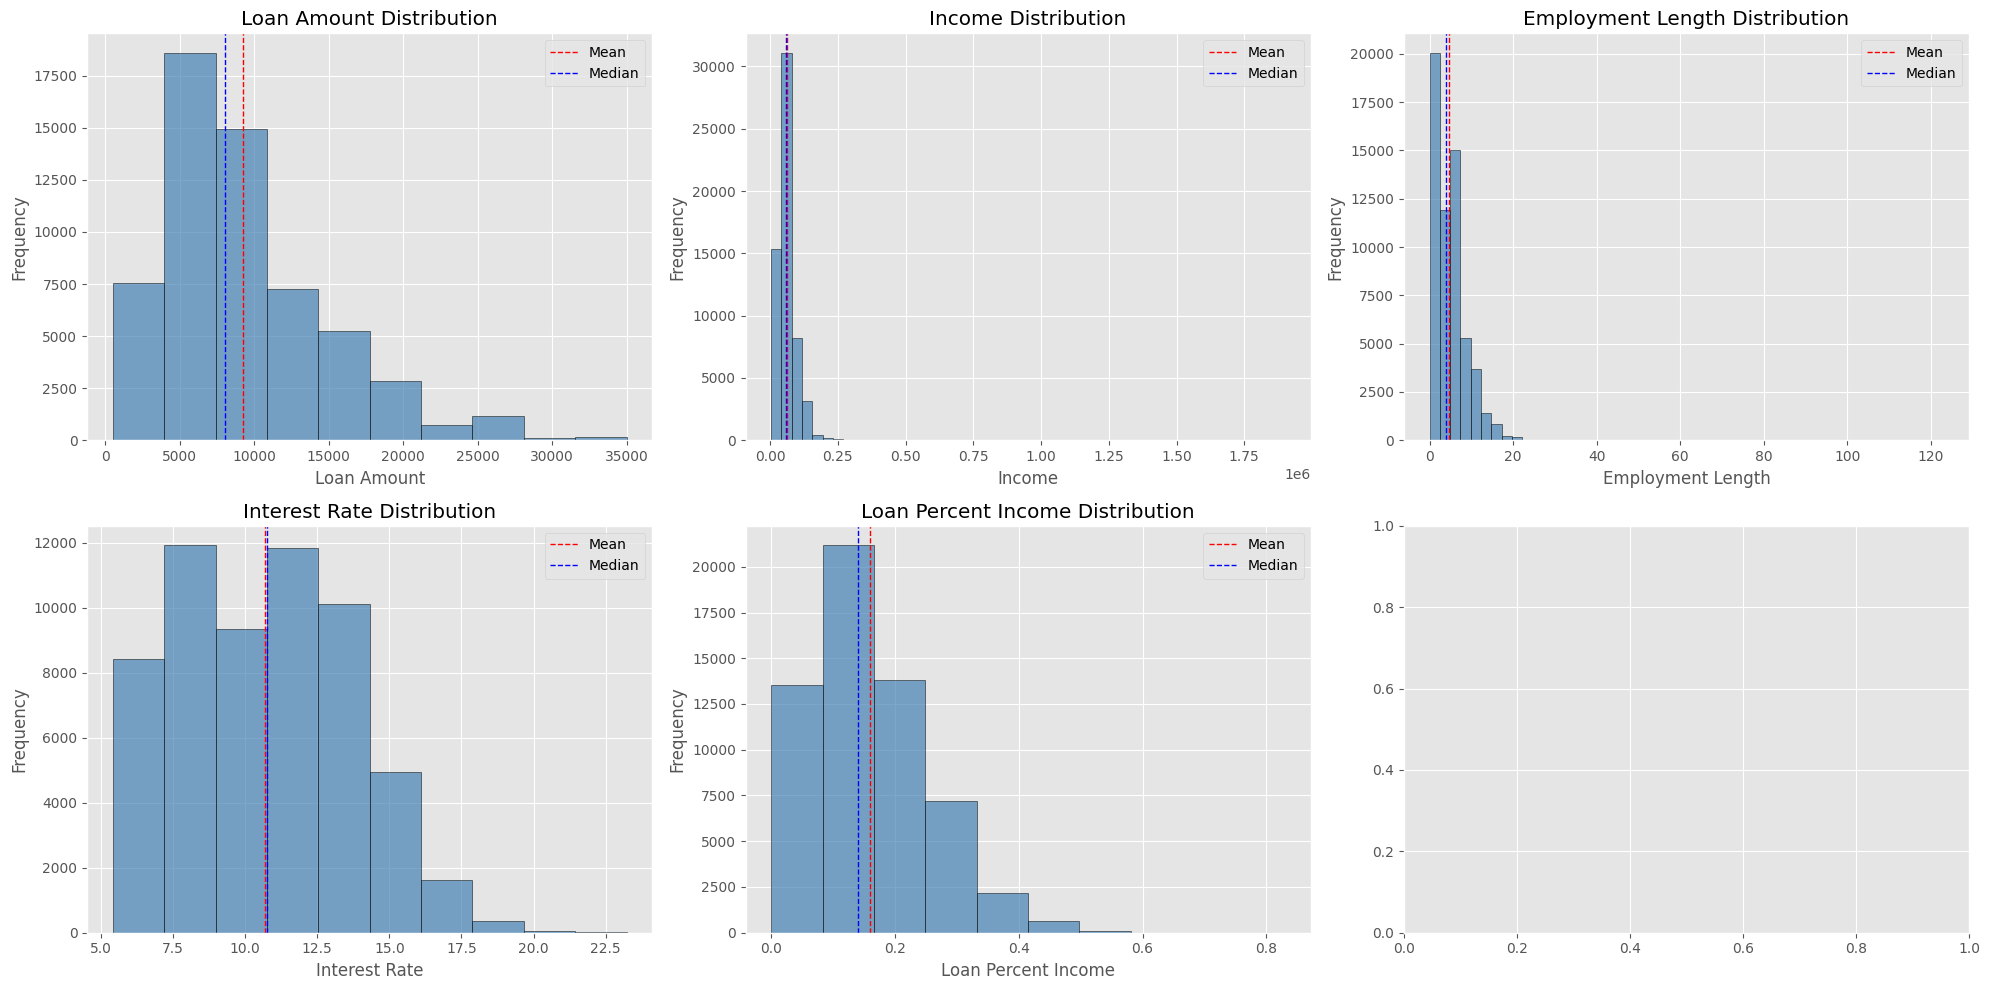

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Review of loan amount distribution
axes[0, 0].hist(train_eda['loan_amnt'], bins=10, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Loan Amount Distribution')
axes[0, 0].axvline(train_eda['loan_amnt'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 0].axvline(train_eda['loan_amnt'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
axes[0, 0].legend()
axes[0, 0].set_xlabel('Loan Amount')
axes[0, 0].set_ylabel('Frequency')

# Review of person income distribution
axes[0, 1].hist(train_eda['person_income'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Income Distribution')
axes[0, 1].axvline(train_eda['person_income'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 1].axvline(train_eda['person_income'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
axes[0, 1].legend()
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')

# Review of employment length distribution
axes[0, 2].hist(train_eda['person_emp_length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Employment Length Distribution')
axes[0, 2].axvline(train_eda['person_emp_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 2].axvline(train_eda['person_emp_length'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
axes[0, 2].legend()
axes[0, 2].set_xlabel('Employment Length')
axes[0, 2].set_ylabel('Frequency')

# Review of loan interest rate distribution
axes[1, 0].hist(train_eda['loan_int_rate'], bins=10, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Interest Rate Distribution')
axes[1, 0].axvline(train_eda['loan_int_rate'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 0].axvline(train_eda['loan_int_rate'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
axes[1, 0].legend()
axes[1, 0].set_xlabel('Interest Rate')
axes[1, 0].set_ylabel('Frequency')

# Review of loan percent income distribution
axes[1, 1].hist(train_eda['loan_percent_income'], bins=10, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Loan Percent Income Distribution')
axes[1, 1].axvline(train_eda['loan_percent_income'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 1].axvline(train_eda['loan_percent_income'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
axes[1, 1].legend()
axes[1, 1].set_xlabel('Loan Percent Income')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [65]:
train_eda.loc[train_eda.loan_amnt > train_eda['loan_amnt'].mean(), 
              ['loan_intent', 'loan_grade', 'person_home_ownership', 'loan_amnt']].sort_values(['loan_amnt'], ascending=True)


,loan_intent,loan_grade,person_home_ownership,loan_amnt
17865,MEDICAL,A,MORTGAGE,9250
52757,MEDICAL,A,MORTGAGE,9250
9176,DEBTCONSOLIDATION,A,MORTGAGE,9250
37695,MEDICAL,B,MORTGAGE,9250
370,VENTURE,A,OWN,9250
...,...,...,...,...
41730,PERSONAL,A,RENT,35000
58165,MEDICAL,C,MORTGAGE,35000
53673,MEDICAL,A,RENT,35000
44542,EDUCATION,A,MORTGAGE,35000


In [66]:
train_eda.loc[train_eda.person_emp_length > train_eda['person_emp_length'].mean(), 
              ['loan_intent', 'loan_grade', 'person_home_ownership', 'person_emp_length']].sort_values(['person_emp_length'], ascending=True)

,loan_intent,loan_grade,person_home_ownership,person_emp_length
29300,EDUCATION,A,MORTGAGE,5.0
11943,DEBTCONSOLIDATION,B,MORTGAGE,5.0
35111,VENTURE,A,MORTGAGE,5.0
11938,MEDICAL,A,RENT,5.0
35118,HOMEIMPROVEMENT,B,MORTGAGE,5.0
...,...,...,...,...
50559,MEDICAL,B,RENT,39.0
9997,PERSONAL,D,RENT,41.0
26125,HOMEIMPROVEMENT,B,RENT,41.0
49252,VENTURE,B,MORTGAGE,123.0


In [67]:
train_eda.loc[train_eda.person_income > train_eda['person_income'].mean(), 
              ['loan_intent', 'loan_grade', 'person_home_ownership', 'person_income']].sort_values(['person_income'], ascending=True)

,loan_intent,loan_grade,person_home_ownership,person_income
46302,DEBTCONSOLIDATION,A,MORTGAGE,64064
32830,MEDICAL,B,RENT,64125
57670,EDUCATION,B,RENT,64125
39030,DEBTCONSOLIDATION,B,RENT,64125
33579,VENTURE,A,MORTGAGE,64197
...,...,...,...,...
2093,PERSONAL,A,RENT,1200000
19060,DEBTCONSOLIDATION,A,MORTGAGE,1200000
37591,DEBTCONSOLIDATION,C,MORTGAGE,1824000
12404,VENTURE,A,RENT,1839784


In [68]:
train_eda.loc[train_eda.loan_percent_income > train_eda['loan_percent_income'].mean(), 
              ['loan_intent', 'loan_grade', 'person_home_ownership', 'loan_percent_income']].sort_values(['loan_percent_income'], ascending=True)

,loan_intent,loan_grade,person_home_ownership,loan_percent_income
45466,PERSONAL,B,RENT,0.16
10845,VENTURE,C,MORTGAGE,0.16
4446,PERSONAL,C,RENT,0.16
51337,VENTURE,D,RENT,0.16
4450,DEBTCONSOLIDATION,A,RENT,0.16
...,...,...,...,...
21747,HOMEIMPROVEMENT,E,RENT,0.56
44806,HOMEIMPROVEMENT,C,RENT,0.56
54980,VENTURE,D,RENT,0.59
56034,HOMEIMPROVEMENT,B,OWN,0.63


In [69]:
train_eda.loc[train_eda.loan_int_rate > train_eda['loan_int_rate'].mean(), 
              ['loan_intent', 'loan_grade', 'person_home_ownership', 'loan_int_rate']].sort_values(['loan_int_rate'], ascending=True)

,loan_intent,loan_grade,person_home_ownership,loan_int_rate
52390,PERSONAL,B,RENT,10.68
13845,MEDICAL,B,MORTGAGE,10.71
50529,EDUCATION,B,MORTGAGE,10.71
27902,EDUCATION,B,MORTGAGE,10.71
10079,DEBTCONSOLIDATION,B,MORTGAGE,10.71
...,...,...,...,...
4996,DEBTCONSOLIDATION,F,RENT,21.74
2409,PERSONAL,F,RENT,22.06
5353,HOMEIMPROVEMENT,G,RENT,22.11
41077,VENTURE,E,RENT,23.06


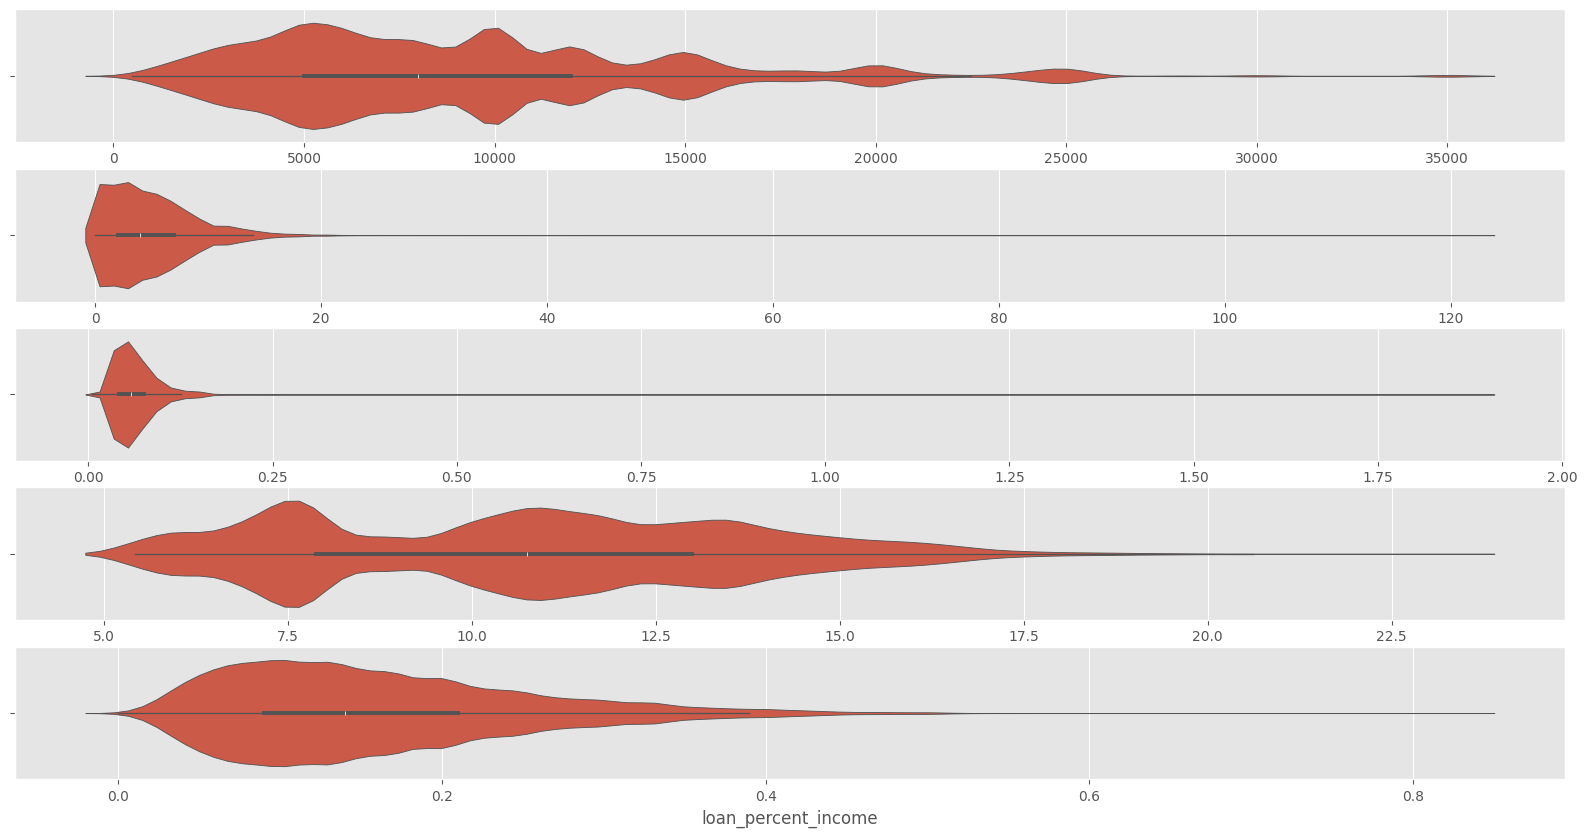

In [70]:
import seaborn as sns
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(5, 1, 1)
ax1.set_xlabel("loan_amnt")
sns.violinplot(data=train_eda.loan_amnt, ax=ax1, orient="h")
ax1.set_yticklabels([])

ax2 = plt.subplot(5, 1, 2)
ax2.set_xlabel("person_emp_length")
sns.violinplot(data=train_eda.person_emp_length, ax=ax2, orient="h")
ax2.set_yticklabels([])

ax3 = plt.subplot(5, 1, 3)
ax3.set_xlabel("person_income")
sns.violinplot(data=train_eda.person_income, ax=ax3, orient="h")
ax3.set_yticklabels([])

ax4 = plt.subplot(5, 1, 4)
ax4.set_xlabel("loan_int_rate")
sns.violinplot(data=train_eda.loan_int_rate, ax=ax4, orient="h")
ax4.set_yticklabels([])

ax5 = plt.subplot(5, 1, 5)
ax5.set_xlabel("loan_percent_income")
sns.violinplot(data=train_eda.loan_percent_income, ax=ax5, orient="h")
ax5.set_yticklabels([])

plt.show()

#### Outliers and Extreme values

/tmp/ipykernel_11767/1974221271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_eda.corr(), linewidths=0.25,
/tmp/ipykernel_11767/1974221271.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.zeros_like(train[to_keep].corr(), dtype=bool)));


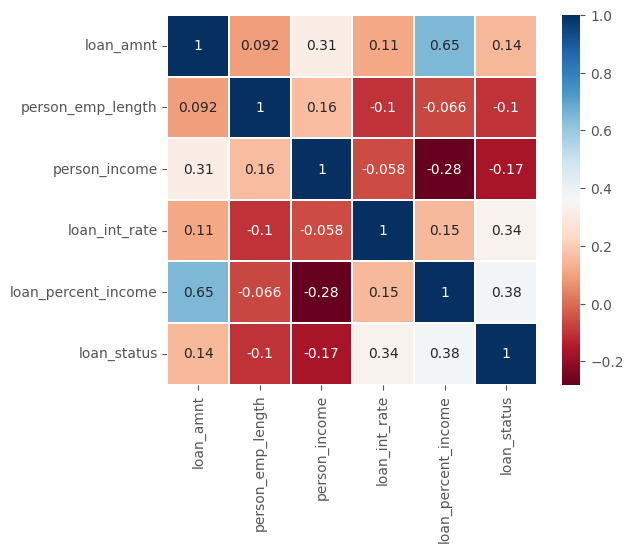

In [71]:
sns.heatmap(train_eda.corr(), linewidths=0.25, 
            vmax=1, square=True, cmap="RdBu", 
            linecolor="white", annot=True,
            mask=np.triu(np.zeros_like(train[to_keep].corr(), dtype=bool)));

There is a strong correlation between loan amount and loan percent income.

In [73]:
train_eda['loan_amnt_q'] = pd.cut(train_eda['loan_amnt'], bins=5, labels=['very low', 'low', 'medium', 'high', 'very high'],
                                  precision=0)

/tmp/ipykernel_11767/4021661021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_eda['loan_amnt_q'] = pd.cut(train_eda['loan_amnt'], bins=5, labels=['very low', 'low', 'medium', 'high', 'very high'],


In [74]:
train_eda['loan_percent_income_q'] = pd.cut(train_eda['loan_percent_income'], bins=5, labels=['very low', 'low', 'medium', 'high', 'very high'],
                                  precision=0)

/tmp/ipykernel_11767/647886158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_eda['loan_percent_income_q'] = pd.cut(train_eda['loan_percent_income'], bins=5, labels=['very low', 'low', 'medium', 'high', 'very high'],


In [75]:
# limit to two decimal places
pd.crosstab(train_eda['loan_amnt_q'], train_eda['loan_percent_income_q'])#, normalize=True).round(2)

loan_percent_income_q,very low,low,medium,high,very high
loan_amnt_q,,,,,
very low,22754,3404,37,3,0
low,10273,10835,1042,18,0
medium,1463,5388,1179,62,1
high,189,1258,440,24,0
very high,25,132,110,8,0


In [76]:
train_eda.loc[(train_eda['loan_amnt_q'] == 'very low') & (train_eda['loan_percent_income_q'] == 'high')].T


,30312,51057,54980
loan_amnt,5825,7000,3775
person_emp_length,2.0,2.0,0.0
loan_intent,PERSONAL,VENTURE,VENTURE
person_income,12000,13200,69000
loan_int_rate,7.49,8.49,18.25
person_home_ownership,OWN,RENT,RENT
loan_grade,A,D,D
loan_percent_income,0.51,0.54,0.59
loan_status,0,1,1
loan_amnt_q,very low,very low,very low


In [77]:
train_eda.loc[(train_eda['loan_amnt_q'] == 'medium') & (train_eda['loan_percent_income_q'] == 'very high')].T

,49179
loan_amnt,16000
person_emp_length,0.0
loan_intent,PERSONAL
person_income,12000
loan_int_rate,10.78
person_home_ownership,RENT
loan_grade,C
loan_percent_income,0.83
loan_status,1
loan_amnt_q,medium


/tmp/ipykernel_11767/734951027.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  intent.set_xticklabels(intent.get_xticklabels(), rotation=45, horizontalalignment='right')


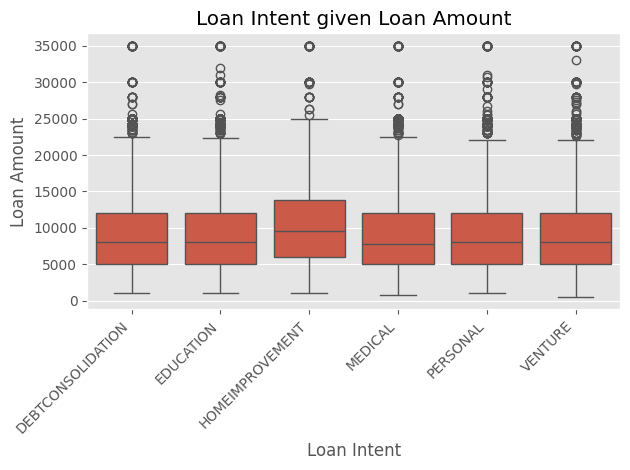

In [78]:
intent = sns.boxplot(x="loan_intent", y="loan_amnt", data=train_eda, order=sorted(train_eda['loan_intent'].unique()))
intent.set(xlabel="Loan Intent", ylabel="Loan Amount", title="Loan Intent given Loan Amount")
intent.set_xticklabels(intent.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11767/3644105500.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  intent.set_xticklabels(intent.get_xticklabels(), rotation=45, horizontalalignment='right')


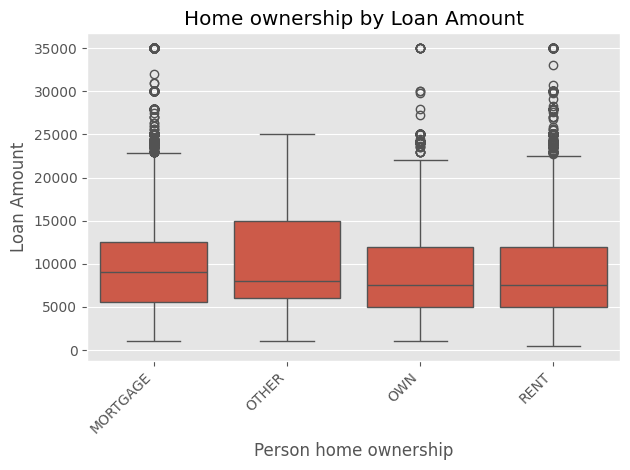

In [79]:
intent = sns.boxplot(x="person_home_ownership", y="loan_amnt", data=train_eda, order=sorted(train_eda['person_home_ownership'].unique()))
intent.set(xlabel="Person home ownership", ylabel="Loan Amount", title="Home ownership by Loan Amount")
intent.set_xticklabels(intent.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

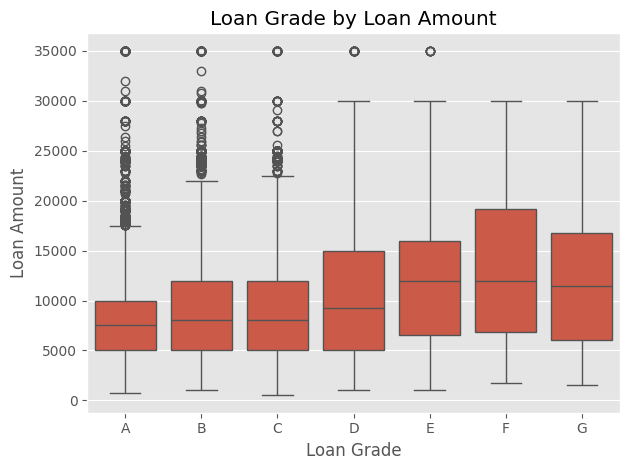

In [80]:
intent = sns.boxplot(x="loan_grade", y="loan_amnt", data=train_eda, order=sorted(train_eda['loan_grade'].unique()))
intent.set(xlabel="Loan Grade", ylabel="Loan Amount", title="Loan Grade by Loan Amount")
plt.tight_layout()
plt.show()